# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of 150 samples of iris flowers, each belonging to one of three species: Iris setosa, Iris versicolor, and Iris virginica. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

##### Target Variable:
- **Species**: The species of the iris flower, which can take one of the following values:
  - 0: Iris setosa
  - 1: Iris versicolor
  - 2: Iris virginica

In [49]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [50]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Bind the disease progression (diabetes target) to the DataFrame
iris_df['species'] = iris_data.target


# Display the DataFrame
iris_df

#Your code here ... 
#print ("Number of rows (observations) :", iris_df.shape[0])
#print ("Number of columns (features) :", iris_df.shape[1])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [51]:
print ("Number of rows (observations) :", iris_df.shape[0])
print ("Number of columns (features) :", iris_df.shape[1])

Number of rows (observations) : 150
Number of columns (features) : 5


> Your answer here ...

#### **Question 2:** 
#### Data-visualization

Create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


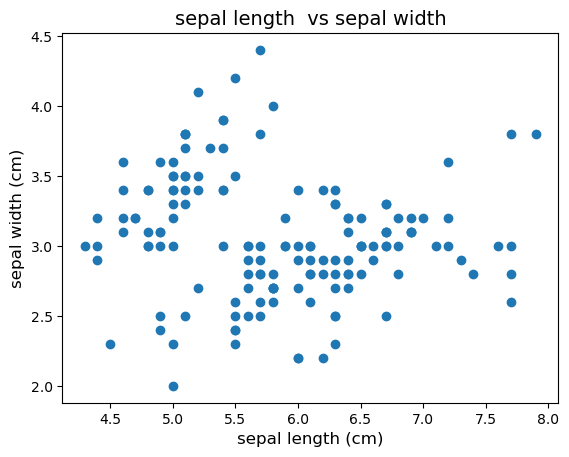

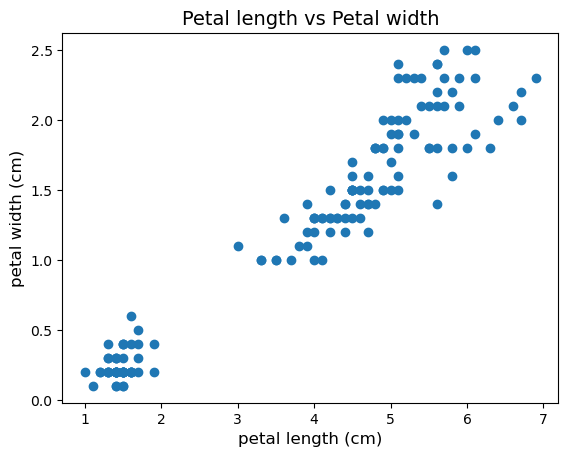

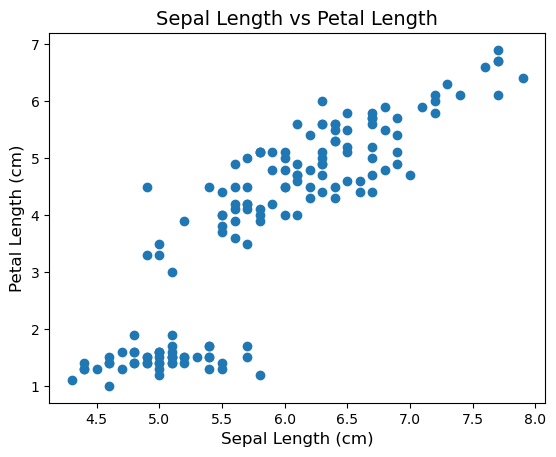

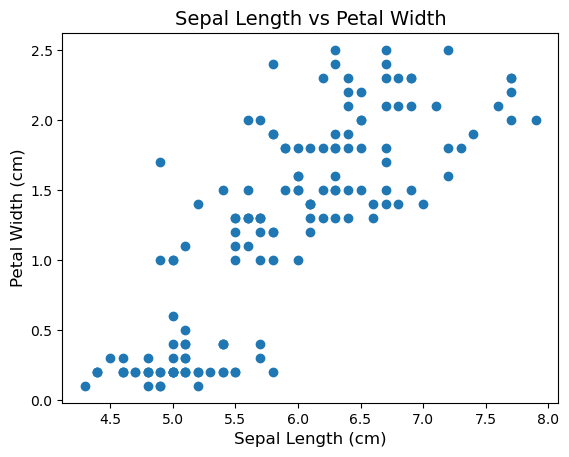

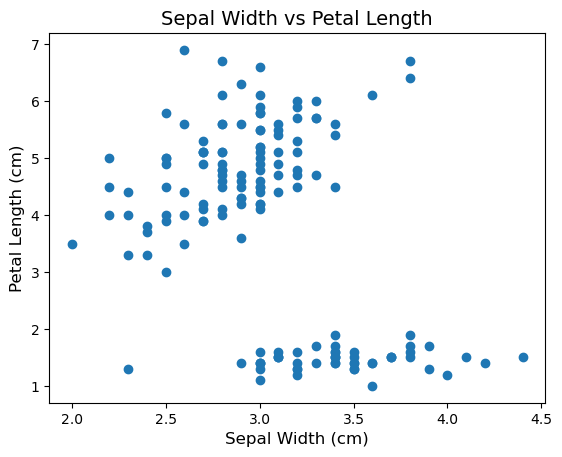

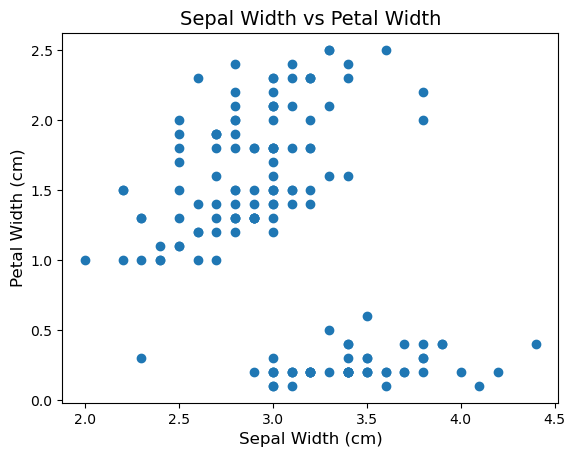

In [52]:
# Your code here ...
# Scatter plot for sepal length vs sepal width
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)']) #,iris_df['petal_length_cm'],iris_df['petal_width_cm'])
plt.title('sepal length  vs sepal width', fontsize=14)
plt.xlabel('sepal length (cm)', fontsize=12)
plt.ylabel('sepal width (cm)', fontsize=12)
plt.show()


# Scatter plot for petal length  vs petal width
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)']) #,iris_df['petal_length_cm'],iris_df['petal_width_cm'])
plt.title('Petal length vs Petal width', fontsize=14)
plt.xlabel('petal length (cm)', fontsize=12)
plt.ylabel('petal width (cm)', fontsize=12)
plt.show()


# Scatter plot for sepal length vs petal length
plt.scatter(iris_df['sepal length (cm)'], iris_df['petal length (cm)'])
plt.title('Sepal Length vs Petal Length', fontsize=14)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.show()

# Scatter plot for sepal length vs petal width
plt.scatter(iris_df['sepal length (cm)'], iris_df['petal width (cm)'])
plt.title('Sepal Length vs Petal Width', fontsize=14)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.show()

# Scatter plot for sepal width vs petal length
plt.scatter(iris_df['sepal width (cm)'], iris_df['petal length (cm)'])
plt.title('Sepal Width vs Petal Length', fontsize=14)
plt.xlabel('Sepal Width (cm)', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)
plt.show()

# Scatter plot for sepal width vs petal width
plt.scatter(iris_df['sepal width (cm)'], iris_df['petal width (cm)'])
plt.title('Sepal Width vs Petal Width', fontsize=14)
plt.xlabel('Sepal Width (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.show()



#### **Question 3:** 
#### Data cleaning

In [53]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features (excluding the species column)
scaled_features = scaler.fit_transform(iris_df.iloc[:, :-1])

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Add the species column back to the scaled DataFrame
scaled_iris_df['species'] = iris_df['species'].values

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

> Your answer here ...   


Standardizing features before using clustering algorithms like K-means is essential because it ensures that all features contribute equally to the clustering process. Since K-means relies on distance calculations, features with larger scales can dominate, skewing the results and leading to misleading clusters. By standardizing, each feature has an equal impact, allowing the algorithm to form clusters that more accurately reflect the relationships within the data.


#### **Question 4:** 
#### K-means clustering 
Apply the K-Means clustering algorithm to the Iris dataset.
Choose the number of clusters (K=3, since there are three species) and fit the model.
Assign cluster labels to the original data and add them as a new column in the DataFrame.

In [54]:
# Your code here ...  
kmeans = KMeans(n_clusters=3, random_state=0)

clusters = kmeans.fit(scaled_iris_df.iloc[:, :-1])


# Create a copy of the DataFrame for clustering and modification
scaled_iris_df_with_clusters = scaled_iris_df[['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)']].copy()


# Add cluster labels to the copied DataFrame
scaled_iris_df_with_clusters['Cluster'] = clusters.labels_
scaled_iris_df_with_clusters['Species'] = iris_df['species'].values
# Display the updated DataFrame with the 'Cluster' column
scaled_iris_df_with_clusters


c:\Users\farim\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster,Species
0,-0.900681,1.019004,-1.340227,-1.315444,1,0
1,-1.143017,-0.131979,-1.340227,-1.315444,1,0
2,-1.385353,0.328414,-1.397064,-1.315444,1,0
3,-1.506521,0.098217,-1.283389,-1.315444,1,0
4,-1.021849,1.249201,-1.340227,-1.315444,1,0
...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2,2
146,0.553333,-1.282963,0.705921,0.922303,0,2
147,0.795669,-0.131979,0.819596,1.053935,2,2
148,0.432165,0.788808,0.933271,1.448832,2,2


Discuss the results of the K-Means clustering. How well did the clusters match the true species?

In [56]:
from sklearn.metrics import confusion_matrix 
conf_matrix = confusion_matrix(iris_df['species'], scaled_iris_df_with_clusters['Cluster'])
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Setosa', 'Versicolor', 'Virginica'], 
                              columns=['Cluster 0', 'Cluster 1', 'Cluster 2'])

# Display the confusion matrix as a table
print(conf_matrix_df)

            Cluster 0  Cluster 1  Cluster 2
Setosa              0         50          0
Versicolor         39          0         11
Virginica          14          0         36


> Your answer here ...   
I used a confussion matrix to compare the result with real species , as it shows Cluster 1 appear to be fully aligned with Setosa. Cluster 2 primarily aligns with Virginica (36 out of 50) but has some Versicolor samples. And , Cluster 0 mostly contains Versicolor (39 out of 50) but includes some Virginica samples.

#### **Question 5:** 
#### Bootstrapping 

 Implement bootstrapping on the mean of one of the sepal or petal measurement variables (e.g., Sepal Length, Petal Width) to assess the stability of the mean estimate. Generate 1000 bootstrap samples, calculate the mean for each sample, and compute a 95% confidence interval to evaluate the variability in the estimate.

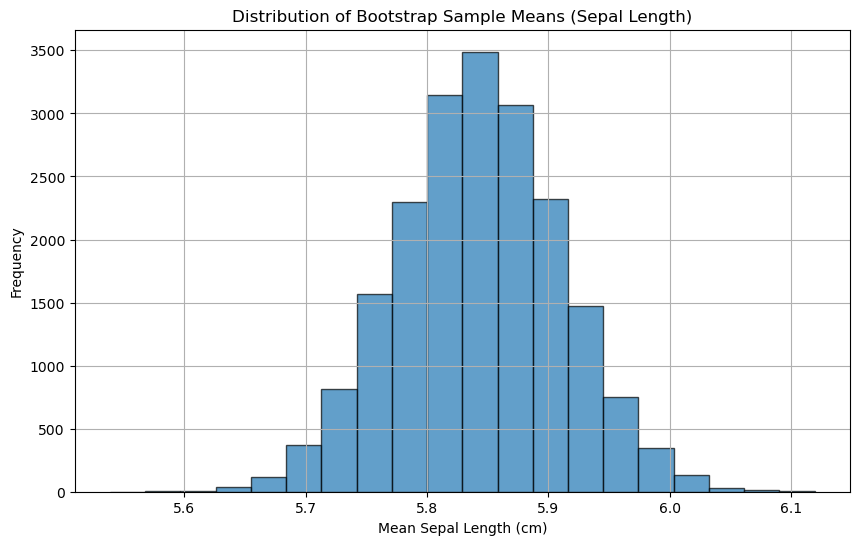

Point Estimate (Mean Sepal Length): 5.843333333333334
95% Confidence Interval: (5.71065, 5.975349999999999)


In [59]:
# Your code here ...

sepal_length = iris_df[['sepal length (cm)']]

# Initialize an empty list to store the bootstrap samples
bootstrap_samples = []

# Generate 20000 bootstrap samples
for i in range(20000):
    sample = sepal_length.sample(frac=1, replace=True)  # Sample with replacement
    sample = sample.assign(replicate=i)  # Add replicate number
    bootstrap_samples.append(sample)  # Store the sample

# Combine all bootstrap samples into one DataFrame
boot20000 = pd.concat(bootstrap_samples)

# Calculate the mean Sepal Length for each bootstrap sample (replicate)
boot_means = boot20000.groupby('replicate')['sepal length (cm)'].mean().reset_index(name='mean_sepal_length')

# Plot the Bootstrap Distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_means["mean_sepal_length"], bins=20, edgecolor='black', alpha=0.7)
plt.title("Distribution of Bootstrap Sample Means (Sepal Length)")
plt.xlabel("Mean Sepal Length (cm)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Calculate the 95% Confidence Interval bounds using .quantile
ci_bounds = boot_means["mean_sepal_length"].quantile([0.025, 0.975])

# Display results
print("Point Estimate (Mean Sepal Length):", sepal_length.mean().values[0])
print("95% Confidence Interval:", (ci_bounds.iloc[0], ci_bounds.iloc[1]))


Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the selected variable appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

> Your answer here ...    
The variability in the bootstrapped means of Sepal Length offers insight into the stability of its mean as an estimate. Observing a narrow spread in the bootstrapped means and a tight 95% confidence interval around the original mean indicates that the mean of Sepal Length is stable and reliable. This low variability suggests that repeated sampling would likely yield similar mean values, making it a consistent measure for the population. Conversely, if the bootstrapped means were widely spread with a broad confidence interval, the mean estimate would be less reliable. Here, the narrow confidence interval supports the conclusion that the mean of Sepal Length is a robust estimate.

















# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
